In [1]:
#imports 
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras 
import pickle

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import time 
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import re
# Natural Language Tool Kit 
#import nltk  
#nltk.download('stopwords') 
#from nltk.corpus import stopwords 
#from nltk.stem.porter import PorterStemmer 
#from collections import Counter
#import cufflinks as cf
#cf.go_offline()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
#import file line unique to Google colab 
#unnessecary for jupyter notebook as files will be opened in the next cell 

from google.colab import files

uploaded = files.upload()

Saving super.txt to super.txt


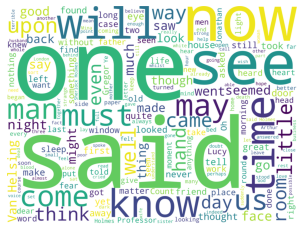

In [23]:
#creating word cloud from the most popular words of the text/data set 
file_content=open ("super.txt").read()

wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 4000,
                            height = 3000
                            ).generate(file_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [38]:
# open txt file/data set line by line 

#change which file to open here using metamorphosis as my baseline example 
file_read = open("metamorphosis_clean.txt", "r", encoding = "utf8")
lines = []

for i in file_read:
    lines.append(i)

#print statements to check lines of data set     
#print("The First Line: ", lines[0])
#print("The Last Line: ", lines[-1])

In [39]:
#cleaning the text data, fixing punctuation,etc 

data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')

import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
#data[:500]

In [40]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

vocab_size = len(tokenizer.word_index) + 1

sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [41]:
X = []
y = []
# turning our sequences into binary arrays 
for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [42]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
#creating our lstm 
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1, 10)             26170     
                                                                 
 lstm_4 (LSTM)               (None, 1, 1000)           4044000   
                                                                 
 lstm_5 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 2617)              2619617   
                                                                 
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


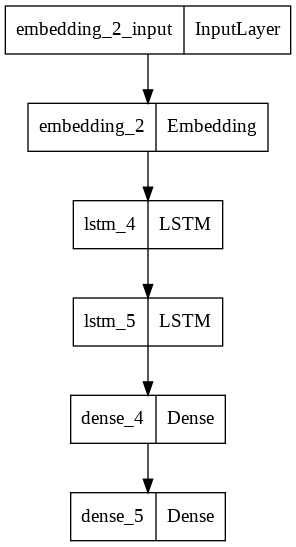

In [45]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
#plot model layers 
keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [47]:
#model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [48]:
#baseline 150 epochs on the moddel  
history= model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])
#using 100 epochs from the baseline 150 epochs 
#training model  
#history= model.fit(X, y, epochs=100, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])


Epoch 1/150
61/61 [==============================] - ETA: 0s - loss: 7.8753 - accuracy: 0.0026
Epoch 1: loss improved from inf to 7.87530, saving model to nextword1.h5
61/61 [==============================] - 19s 237ms/step - loss: 7.8753 - accuracy: 0.0026 - lr: 0.0010
Epoch 2/150
61/61 [==============================] - ETA: 0s - loss: 7.8604 - accuracy: 0.0033
Epoch 2: loss improved from 7.87530 to 7.86037, saving model to nextword1.h5
61/61 [==============================] - 14s 231ms/step - loss: 7.8604 - accuracy: 0.0033 - lr: 0.0010
Epoch 3/150
61/61 [==============================] - ETA: 0s - loss: 7.8224 - accuracy: 0.0015
Epoch 3: loss improved from 7.86037 to 7.82243, saving model to nextword1.h5
61/61 [==============================] - 14s 233ms/step - loss: 7.8224 - accuracy: 0.0015 - lr: 0.0010
Epoch 4/150
61/61 [==============================] - ETA: 0s - loss: 7.6273 - accuracy: 0.0031
Epoch 4: loss improved from 7.82243 to 7.62731, saving model to nextword1.h5
61/61 [

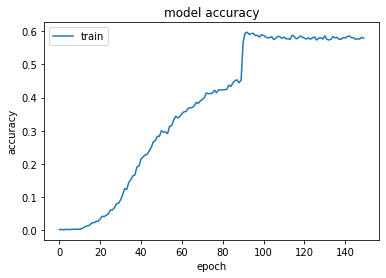

In [49]:
#plot model accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

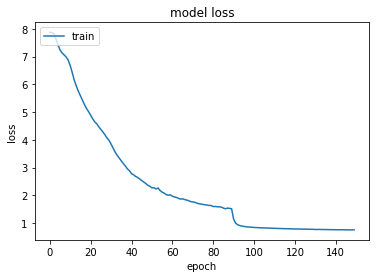

In [50]:

#plot model loss 
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [51]:
# Importing the Libraries
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer

model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
  
    for i in range(3):
        sequence = tokenizer.texts_to_sequences([text])[0]
        sequence = np.array(sequence)
        
        predict_x=model.predict(sequence) 
        classes_x=np.argmax(predict_x,axis=1)
    
        preds = classes_x
        predicted_word = ""
        
        for key, value in tokenizer.word_index.items():
            if value == preds:
                predicted_word = key
                break
        
        print(predicted_word)
        return predicted_word

In [52]:
# word suggestion script from the model 
while(True):

    text = input("Enter your line: ")
    #input to stop the script to predict the next word 
    if text == "stop the script":
        print("Ending The Program.....")
        break
    else:
        try:
            text = text.split(" ")
            text = text[-1]

            text = ''.join(text)
            Predict_Next_Words(model, tokenizer, text)
            
        except:
            continue

Enter your line: one
morning
Enter your line: said
even
Enter your line: see
use
Enter your line: the
chair
Enter your line: stop the script
Ending The Program.....
